In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/sample_submission.csv


In [2]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms

In [3]:
train = pd.read_csv('../input/digit-recognizer/train.csv')
test = pd.read_csv('../input/digit-recognizer/test.csv')

In [4]:
type(train)

pandas.core.frame.DataFrame

In [5]:
X_train = train.iloc[:,1:]
Y_train = train.iloc[:,:1]
X_train.shape
Y_train.shape

(42000, 1)

In [6]:
X_train.shape

(42000, 784)

In [7]:
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
test.shape

(28000, 784)

In [9]:
X_test = test

In [10]:
X_train = np.asarray(X_train)
Y_train = np.asarray(Y_train)

In [11]:
type(X_train)

numpy.ndarray

In [12]:
X_test = np.asarray(X_test)

In [13]:
type(X_test)

numpy.ndarray

In [14]:
X_train, Y_train, X_test = map(torch.tensor, (X_train, Y_train, X_test))

In [15]:
type(X_train)

torch.Tensor

In [16]:
print(X_train)

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]])


In [17]:
X_train.float()
print(X_train)

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]])


In [18]:
Y_train.float()

tensor([[1.],
        [0.],
        [1.],
        ...,
        [7.],
        [6.],
        [9.]])

In [19]:
class modelv1(nn.Module):
    def __init__(self):
        super(modelv1, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(784, 100),
            nn.Linear(100, 10)
        )
    def forward(self, X):
        return self.net(X)

In [20]:
import torch.optim as optim

In [21]:
Y_train.shape

torch.Size([42000, 1])

In [22]:
Y_train = Y_train.reshape([42000,])

In [23]:
import matplotlib.pyplot as plt

In [24]:
def fitv1(X, Y,model, lossfn, epochs = 1):
    loss_per_epoch = []
    for i in range(epochs):
        opt.zero_grad()
        output = model(X)
    
        loss = lossfn(output, Y)
        loss_per_epoch.append(loss)
        loss.backward()
        #print("Epoch", i)
    
        opt.step()
    
    plt.plot(loss_per_epoch)
    plt.xlabel('Epochs')
    plt.ylabel('CE Loss')
    plt.show()
        

In [25]:
model = modelv1()

In [26]:
lossfn = nn.CrossEntropyLoss()
opt = optim.Adam(model.parameters(), lr=0.01, weight_decay=0.0001)

In [27]:
def accuracy(y_hat, y):
  pred = torch.argmax(y_hat, dim=1)
  print(pred)
  print(y)
  return (pred == y).float().mean()

In [28]:
type(X_train)

torch.Tensor

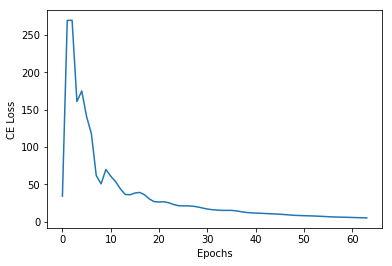

In [29]:
fitv1(X_train.float(), Y_train.long(),model, lossfn, 64)

In [30]:
print(accuracy(model(X_train.float()), Y_train.long()))

tensor([1, 0, 1,  ..., 7, 6, 9])
tensor([1, 0, 1,  ..., 7, 6, 9])
tensor(0.9147)


In [31]:
class modelv2(nn.Module):
    def __init__(self):
        super(modelv2, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(784, 100),
            nn.Sigmoid(),
            nn.Linear(100, 10)
        )
    def forward(self, X):
        return self.net(X)

In [32]:
model2 = modelv2()

In [33]:
lossfn = nn.CrossEntropyLoss()
opt = optim.Adam(model2.parameters(), lr=0.01, weight_decay=0.0001)

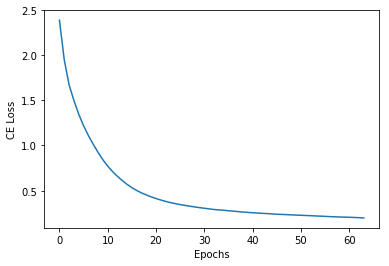

In [34]:
fitv1(X_train.float(), Y_train.long(),model2, lossfn, 64)

In [35]:
print(accuracy(model2(X_train.float()), Y_train.long()))

tensor([1, 0, 1,  ..., 7, 6, 9])
tensor([1, 0, 1,  ..., 7, 6, 9])
tensor(0.9455)


In [36]:
Y_test = model2.forward(X_test.float())

In [37]:
Y_test.shape

torch.Size([28000, 10])

In [38]:
X_test.shape

torch.Size([28000, 784])

In [39]:
Y_test = torch.argmax(Y_test, dim=1)

In [40]:
Y_test

tensor([2, 0, 9,  ..., 3, 9, 2])

In [41]:
X = [i for i in range(1, 28001)]

In [42]:
submission = pd.DataFrame({'ImageId':X, 'Label':Y_test})
submission = submission[['ImageId', 'Label']]
submission['Label'].value_counts()

1    3209
7    2899
8    2822
4    2809
2    2796
0    2783
3    2781
6    2771
9    2736
5    2394
Name: Label, dtype: int64

In [43]:
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [44]:
submission.to_csv("submission.csv", index=False)